<a href="https://colab.research.google.com/github/jonatahpfg/Projeto-ICD-UFPB/blob/main/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

dfalbum = pd.read_csv("https://raw.githubusercontent.com/jonatahpfg/Trabalho-ICD-UFPB/main/arquivos_csv/albumlist.csv", encoding='latin1')
df = pd.read_csv("https://raw.githubusercontent.com/jonatahpfg/Trabalho-ICD-UFPB/main/arquivos_csv/history_of_rock.csv", error_bad_lines=False)
df_music = pd.read_csv("https://raw.githubusercontent.com/jonatahpfg/Trabalho-ICD-UFPB/main/arquivos_csv/music.csv")

<ipython-input-11-3181570c529d>:7: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv("https://raw.githubusercontent.com/jonatahpfg/Trabalho-ICD-UFPB/main/arquivos_csv/history_of_rock.csv", error_bad_lines=False)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='danceability', ylabel='loudness'>

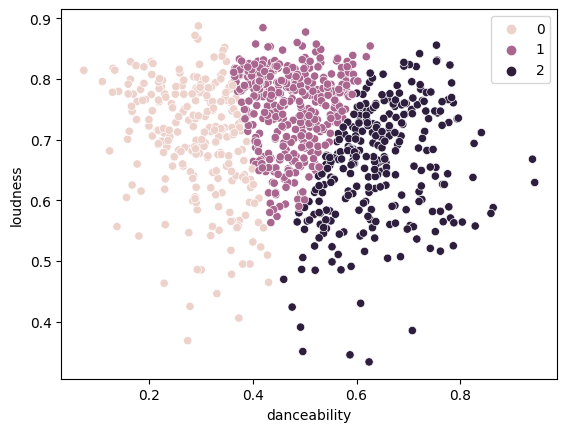

In [ ]:
df_minusculo = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df_music_minusculo = df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


df_renomeado = df_minusculo[['name', 'artist', 'popularity']]
df_renomeado = df_renomeado.rename(columns={'name': 'track_name', 'artist': 'artist_name'})


resultado = pd.merge(df_renomeado, df_music, on=['track_name', 'artist_name'], how='inner')
resultado = resultado.dropna()

del resultado['Unnamed: 0']
df_group = resultado[['danceability', 'loudness'] ]


kmeans = KMeans(n_clusters=3)  # 

kmeans.fit(df_group)


labels = kmeans.labels_

resultado['Cluster'] = labels

centroids = kmeans.cluster_centers_


sns.scatterplot(data=resultado, x="danceability", y="loudness", hue=kmeans.labels_)

In [ ]:
resultado[kmeans.labels_ == 1]

,track_name,artist_name,popularity,release_date,genre,lyrics,len,dating,violence,world/life,...,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age,Cluster
5,layla,derek & the dominos,74,1970,country,lonely wait run hide long know foolish pride k...,43,0.001462,0.001462,0.041827,...,0.001462,0.365320,0.817706,0.551204,0.295547,0.505359,0.916914,sadness,0.714286,1
7,you shook me all night long,ac/dc,80,1980,rock,black sack long loose noose keep hang lookin c...,24,0.002506,0.243040,0.082761,...,0.002506,0.509369,0.772966,0.002881,0.000519,0.753710,0.767761,obscene,0.571429,1
10,welcome to the jungle,guns n' roses,78,1987,rock,jump welcome jungle game want know name people...,110,0.035026,0.329745,0.000822,...,0.063283,0.423806,0.799221,0.019577,0.286437,0.301319,0.987988,violence,0.471429,1
12,money,pink floyd,72,1973,rock,money away good okay money grab cash hand stas...,21,0.003289,0.003289,0.003289,...,0.046416,0.441135,0.647027,0.024196,0.002034,0.782564,0.537523,obscene,0.671429,1
22,good riddance (time of your life),green day,75,1997,pop,fuck turn point fork stick road time grab wris...,46,0.001645,0.148431,0.301135,...,0.063639,0.447633,0.713099,0.183734,0.000000,0.643446,0.432415,night/time,0.328571,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,doa,foo fighters,58,2005,rock,know feel fine gonna change mind wait wait lon...,109,0.000532,0.357688,0.181641,...,0.033210,0.433554,0.804015,0.000189,0.001437,0.717642,0.913911,violence,0.214286,1
943,soul kitchen,x,23,1980,pop,clock say time close guess better wouldn wanna...,116,0.054119,0.135968,0.317212,...,0.000675,0.483375,0.803861,0.002037,0.001123,0.837181,0.942941,world/life,0.571429,1
947,nazi punks fuck off,dead kennedys,53,2001,rock,fuck overproduce hannett punk religious cult p...,93,0.001698,0.226152,0.001698,...,0.001698,0.363154,0.810912,0.001324,0.000000,0.672300,0.923922,obscene,0.271429,1
951,i’ll be loving you,the king khan & bbq show,50,2009,blues,baby blue moon eye star fall darlin misery hea...,58,0.069395,0.000940,0.000940,...,0.000940,0.412975,0.796580,0.412650,0.000000,0.703215,0.876873,romantic,0.157143,1


In [ ]:


cluster_data = resultado[kmeans.labels_ == 1]

# Contar a frequência dos estilos musicais no cluster
style_counts = cluster_data['topic'].value_counts()

# Exibir os estilos musicais que mais se repetem
print(style_counts.head(10))

violence      128
sadness        91
world/life     73
obscene        55
music          24
night/time     22
romantic       11
feelings        8
Name: topic, dtype: int64
